In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


# ML methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.utils.multiclass import type_of_target


from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR


# Importing data

In [3]:
df = pd.read_csv("Elrond.csv")
df.tail()

,Date,Open,High,Low,Close,Volume,Currency
573,2022-03-31,197.911880,204.737946,185.458008,186.576248,198349270,USD
574,2022-04-01,186.737473,198.199997,179.624374,198.154251,197245454,USD
575,2022-04-02,198.108917,201.515518,191.532303,191.932449,156943971,USD
576,2022-04-03,191.934052,198.187180,188.972794,195.318451,125071363,USD
577,2022-04-04,194.688370,197.426605,184.847427,188.632019,158472592,USD


In [4]:
df.fillna(method= 'ffill')

,Date,Open,High,Low,Close,Volume,Currency
0,2020-09-04,17.199446,20.426851,16.956684,17.663235,17523619,USD
1,2020-09-05,17.668823,17.721092,10.540353,12.363200,14702761,USD
2,2020-09-06,12.369630,14.389669,11.872577,13.388014,11250929,USD
3,2020-09-07,13.388372,13.549776,12.040600,13.220532,12113978,USD
4,2020-09-08,13.223187,15.521870,13.218848,13.879171,18565986,USD
...,...,...,...,...,...,...,...
573,2022-03-31,197.911880,204.737946,185.458008,186.576248,198349270,USD
574,2022-04-01,186.737473,198.199997,179.624374,198.154251,197245454,USD
575,2022-04-02,198.108917,201.515518,191.532303,191.932449,156943971,USD
576,2022-04-03,191.934052,198.187180,188.972794,195.318451,125071363,USD


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume,Currency
0,2020-09-04,17.199446,20.426851,16.956684,17.663235,17523619,USD
1,2020-09-05,17.668823,17.721092,10.540353,12.363200,14702761,USD
2,2020-09-06,12.369630,14.389669,11.872577,13.388014,11250929,USD
3,2020-09-07,13.388372,13.549776,12.040600,13.220532,12113978,USD
4,2020-09-08,13.223187,15.521870,13.218848,13.879171,18565986,USD
...,...,...,...,...,...,...,...
573,2022-03-31,197.911880,204.737946,185.458008,186.576248,198349270,USD
574,2022-04-01,186.737473,198.199997,179.624374,198.154251,197245454,USD
575,2022-04-02,198.108917,201.515518,191.532303,191.932449,156943971,USD
576,2022-04-03,191.934052,198.187180,188.972794,195.318451,125071363,USD


# Plotting Data

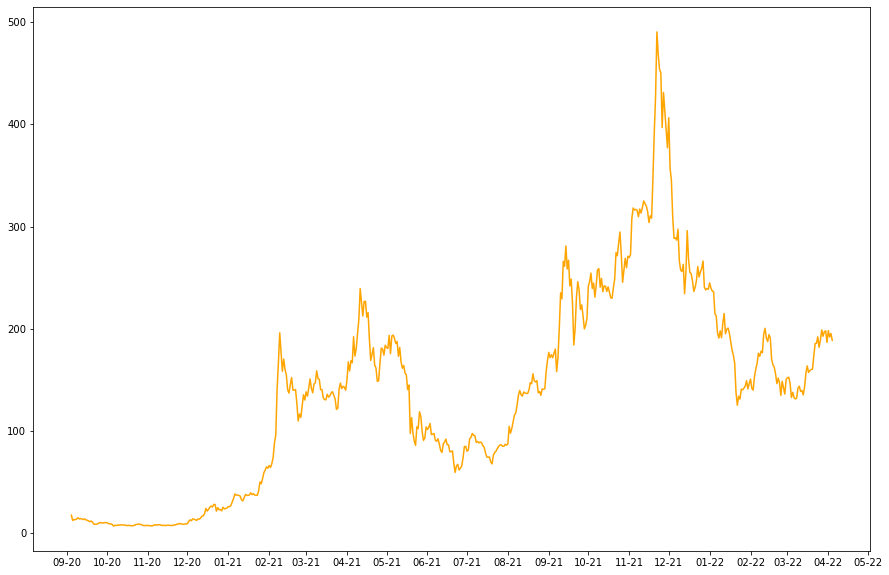

In [6]:
# ALL TIME PRICE
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.plot(df['Date'], df['Close'], color="orange")
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%y'))

plt.show()

In [7]:
current_year = df[df['Date'] > '2022-01-01']


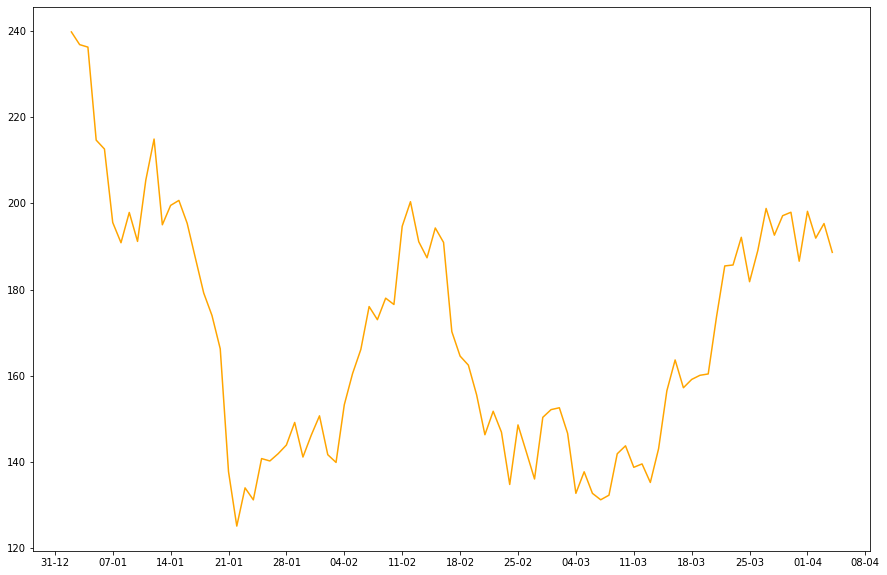

In [8]:
# 2022 WEEKLY PRICE 

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.plot(current_year['Date'], current_year['Close'], color="orange")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))

plt.show()

In [9]:
y = df['Close']
X = df.copy()
X = X.drop(['Date', 'Close', 'Currency'], axis=1)

In [10]:
test_size = round(len(df)*0.2)
#X_train, X_validation, y_train, y_validation = scsplit(X, y, test_size=0.2, stratify = y, random_state=0)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=test_size, random_state=0, shuffle=False)

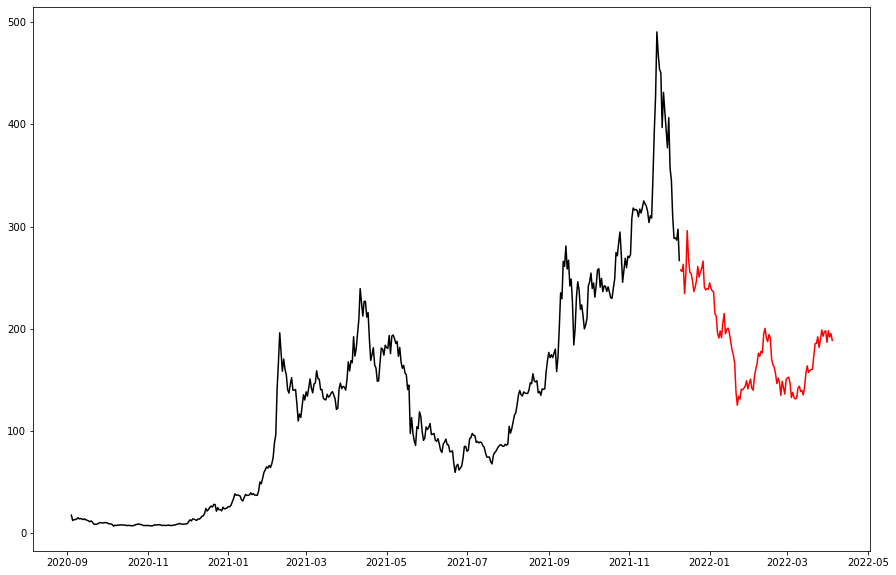

In [11]:
train_size = len(df) - test_size

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot()
ax.plot(df['Date'][:train_size], df['Close'][:train_size], color='black')
ax.plot(df['Date'][train_size:], df['Close'][train_size:], color='red')

plt.show()

# Model Test

## Differents algorithm tests

In [12]:
models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('LGBMRegressor', LGBMRegressor()))
models.append(('SGDRegressor', SGDRegressor()))
models.append(('KernelRidge', KernelRidge()))
models.append(('ElasticNet', ElasticNet()))
models.append(('BayesianRidge', BayesianRidge()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('SVR', SVR()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('LinearSVR', LinearSVR()))
models

[('LinearRegression', LinearRegression()),
 ('LGBMRegressor', LGBMRegressor()),
 ('SGDRegressor', SGDRegressor()),
 ('KernelRidge', KernelRidge()),
 ('ElasticNet', ElasticNet()),
 ('BayesianRidge', BayesianRidge()),
 ('GradientBoostingRegressor', GradientBoostingRegressor()),
 ('SVR', SVR()),
 ('DecisionTreeRegressor', DecisionTreeRegressor()),
 ('LinearSVR', LinearSVR())]

In [13]:
def get_model_mae(model, X_train, X_validation, y_train, y_validation):
    model.fit(X_train, y_train)
    preds_val = model.predict(X_validation)
    mae = mean_absolute_error(y_validation, preds_val)
    return(mae)

In [14]:
results = []
names = []
for name, model in models:
	mae = get_model_mae(model,X_train, X_validation, y_train, y_validation)
	# results.append(mae)
	# names.append(name)
	print(f"{name} : {mae}")

LinearRegression : 4.375142174032865
LGBMRegressor : 5.834104480751901
SGDRegressor : 3.4877474181493284e+25
KernelRidge : 4.378574174025961
ElasticNet : 4.38965392534507


c:\Anaconda\envs\projet_pite\lib\site-packages\sklearn\linear_model\_ridge.py:196: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


BayesianRidge : 4.3704859608555635
GradientBoostingRegressor : 5.618571427760847
SVR : 51.143103265123116
DecisionTreeRegressor : 6.359374276522929
LinearSVR : 540.4566201546502


c:\Anaconda\envs\projet_pite\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## DecisionTreeRegressor

In [14]:
from sklearn.model_selection import GridSearchCV


decision_tree_model = DecisionTreeRegressor()

# parameters that we will try to tune
params_decision_tree = {
    'max_leaf_nodes': range(1, 1000, 10),
}

param_search = GridSearchCV( estimator=decision_tree_model, param_grid=params_decision_tree,
                verbose=1)
                
param_search.fit(X_train, y_train)

best_score = param_search.best_score_
best_params = param_search.best_params_

print(f'Best accuracy: {best_score} was obtained with parameters: {best_params}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best accuracy: 0.08559378621102817 was obtained with parameters: {'max_leaf_nodes': 311}


### Final model

In [15]:
decision_tree_final_model = DecisionTreeRegressor(**best_params)
decision_tree_final_model.fit(X_train, y_train)
final_decision_tree_predictions = decision_tree_final_model.predict(X_validation)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_validation, final_decision_tree_predictions)))

Mean Absolute Error - MAE : 6.081351510409649


In [16]:
decision_tree_train_predict=decision_tree_final_model.predict(X_train)
decision_tree_validation_predict=decision_tree_final_model.predict(X_validation)

print("Train data prediction:", decision_tree_train_predict.shape)
print("Validation data prediction:", decision_tree_validation_predict.shape)


Train data prediction: (462,)
Validation data prediction: (116,)


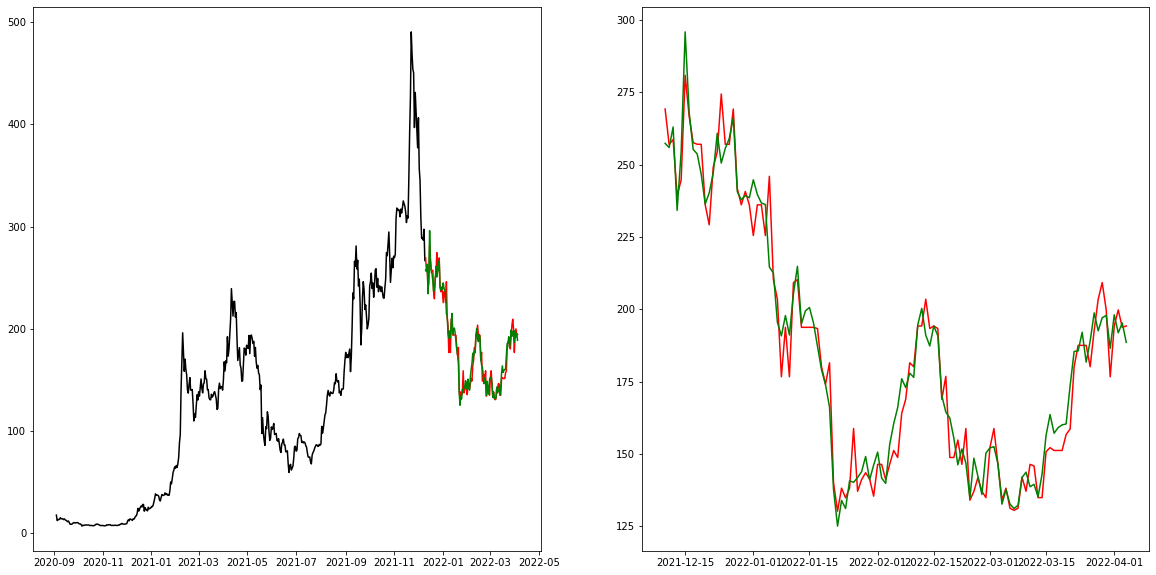

In [17]:
f,axs = plt.subplots(1,2,figsize=(20,10))

axs[0].plot(df['Date'][:train_size], df['Close'][:train_size], color='black')
axs[0].plot(df['Date'][train_size:], decision_tree_validation_predict, color='red')
axs[0].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')
axs[1].plot(df['Date'][train_size:], decision_tree_validation_predict, color='red')
axs[1].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')

plt.show()

## Bayesian Ridge

In [18]:
from sklearn.model_selection import GridSearchCV


bayesian_model = BayesianRidge()

# parameters that we will try to tune
params_bayesian = {
    'n_iter': range(1, 100, 1),
}

param_search = GridSearchCV( estimator=bayesian_model, param_grid=params_bayesian,
                verbose=1)
                
param_search.fit(X_train, y_train)

best_score = param_search.best_score_
best_params = param_search.best_params_

print(f'Best accuracy: {best_score} was obtained with parameters: {best_params}')

Fitting 5 folds for each of 99 candidates, totalling 495 fits
Best accuracy: 0.9794540568321708 was obtained with parameters: {'n_iter': 4}


In [19]:
bayesian_final_model = BayesianRidge(**best_params)
bayesian_final_model.fit(X_train, y_train)
final_bayesian_predictions = bayesian_final_model.predict(X_validation)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_validation, final_bayesian_predictions)))

Mean Absolute Error - MAE : 4.3704859608555635


In [20]:
bayesian_train_predict=bayesian_final_model.predict(X_train)
bayesian_validation_predict=bayesian_final_model.predict(X_validation)

print("Train data prediction:", bayesian_train_predict.shape)
print("Validation data prediction:", bayesian_validation_predict.shape)

Train data prediction: (462,)
Validation data prediction: (116,)


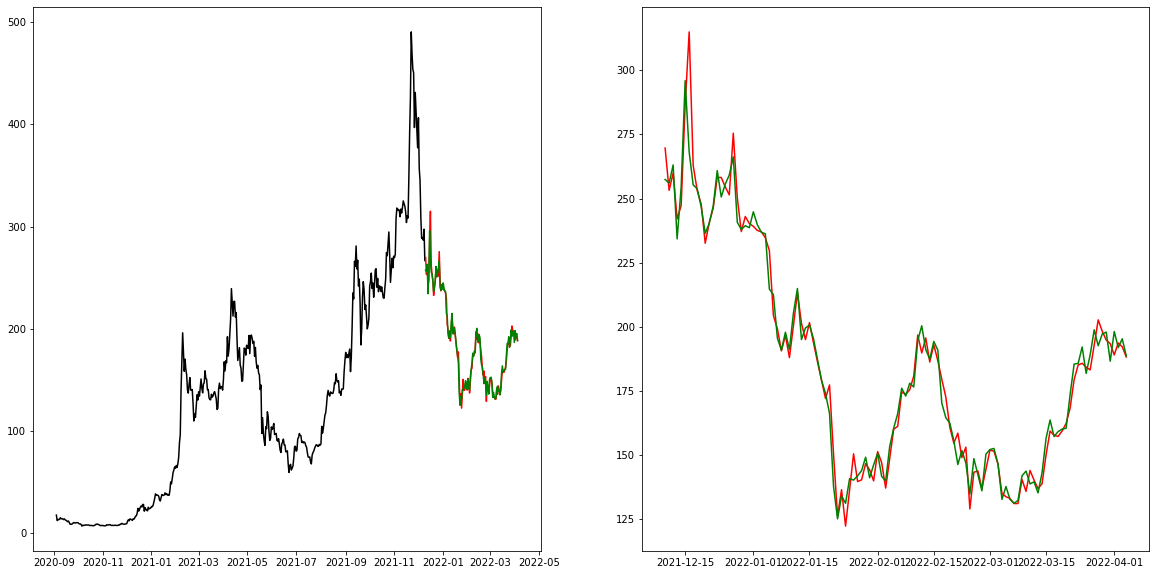

In [21]:
f,axs = plt.subplots(1,2,figsize=(20,10))

axs[0].plot(df['Date'][:train_size], df['Close'][:train_size], color='black')
axs[0].plot(df['Date'][train_size:], bayesian_validation_predict, color='red')
axs[0].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')
axs[1].plot(df['Date'][train_size:], bayesian_validation_predict, color='red')
axs[1].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')

plt.show()

## Linear Regression

In [15]:
linear_regression_final_model = LinearRegression()
linear_regression_final_model.fit(X_train, y_train)
final_linear_regression_predictions = linear_regression_final_model.predict(X_validation)
print("Mean Absolute Error - MAE : " + str(mean_absolute_error(y_validation, final_linear_regression_predictions)))

Mean Absolute Error - MAE : 4.375142174032865


In [16]:
linear_regression_train_predict=linear_regression_final_model.predict(X_train)
linear_regression_validation_predict=linear_regression_final_model.predict(X_validation)

print("Train data prediction:", linear_regression_train_predict.shape)
print("Validation data prediction:", linear_regression_validation_predict.shape)

Train data prediction: (462,)
Validation data prediction: (116,)


In [19]:
X_train.shape, y_train.shape

((462, 4), (462,))

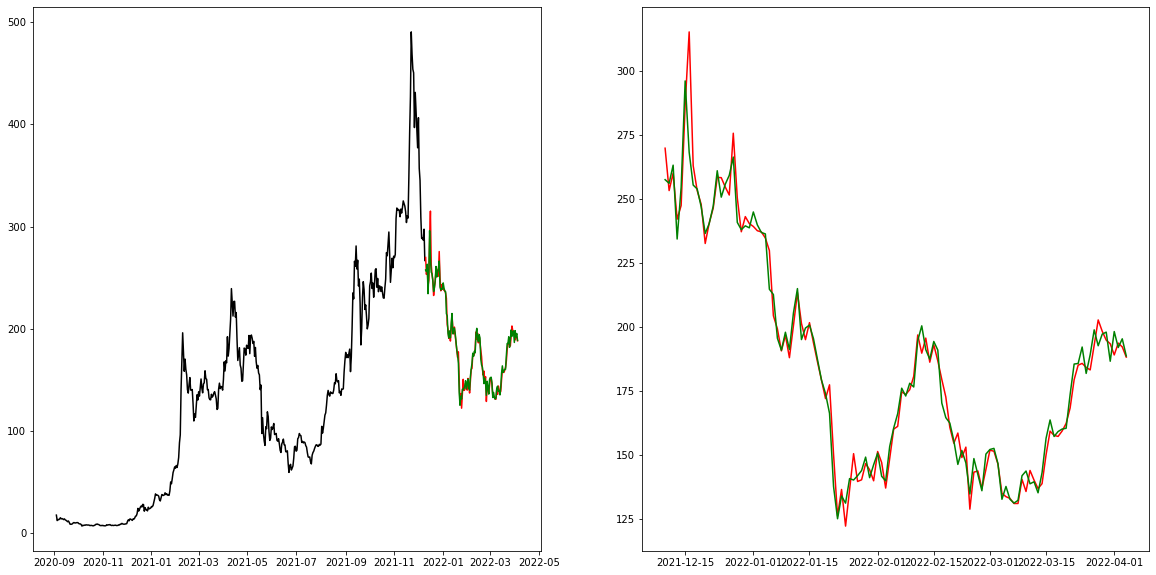

In [20]:
f,axs = plt.subplots(1,2,figsize=(20,10))

axs[0].plot(df['Date'][:train_size], df['Close'][:train_size], color='black')
axs[0].plot(df['Date'][train_size:], final_linear_regression_predictions, color='red')
axs[0].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')
axs[1].plot(df['Date'][train_size:], final_linear_regression_predictions, color='red')
axs[1].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')

# Comparaison between models

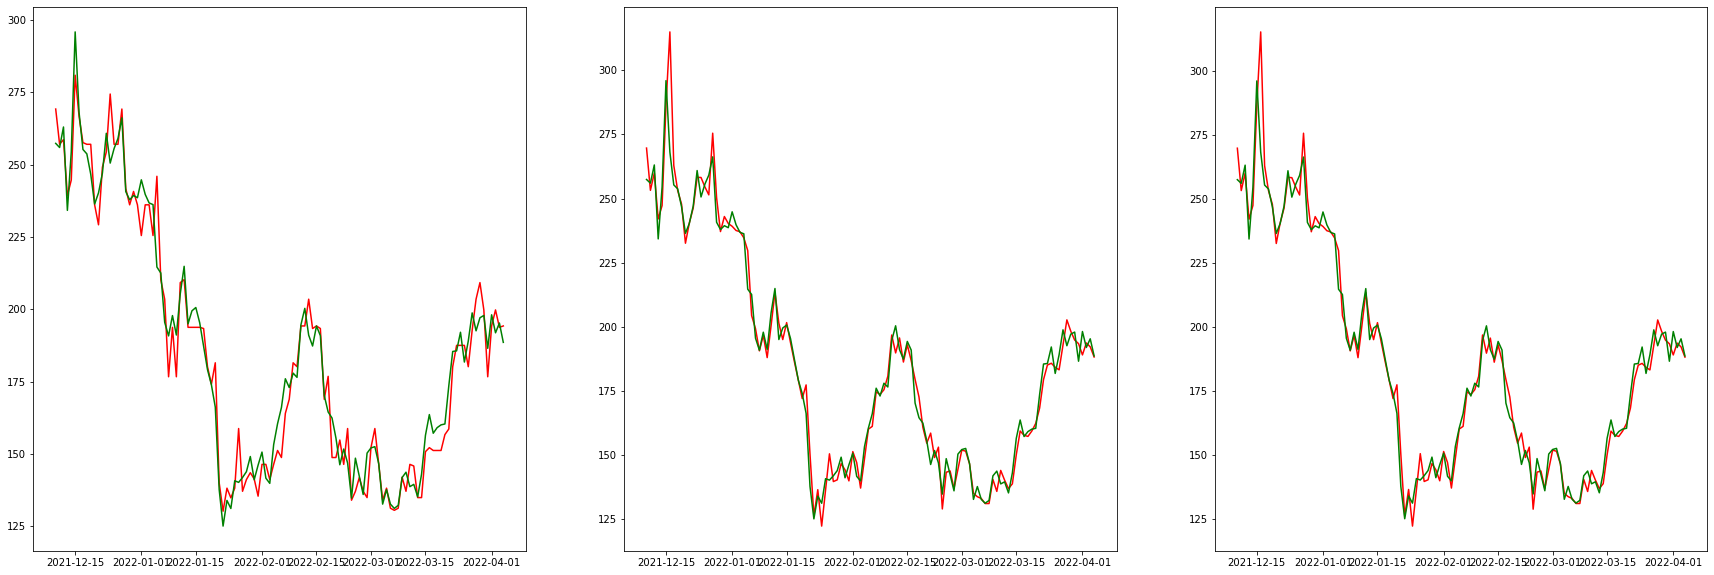

In [25]:
f,axs = plt.subplots(1,3,figsize=(30,10))

axs[0].plot(df['Date'][train_size:], decision_tree_validation_predict, color='red')
axs[0].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')
axs[1].plot(df['Date'][train_size:], bayesian_validation_predict, color='red')


axs[1].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')
axs[2].plot(df['Date'][train_size:], linear_regression_validation_predict, color='red')
axs[2].plot(df['Date'][train_size:], df['Close'][train_size:], color='green')